In [ ]:
using Grassmann
basis"0,1,1,1"

In [ ]:
length = 0.84; radius = 0.0775; mass = 46.7; muzzleVelocity = 827.0;
I = mass*(1/12*(3radius^2 + length^2)*(v₁₂ + v₁₃) + 1/2*radius^2*v₁₄ + 1.0v₂₃ + 1.0v₂₄ + 1.0v₃₄)


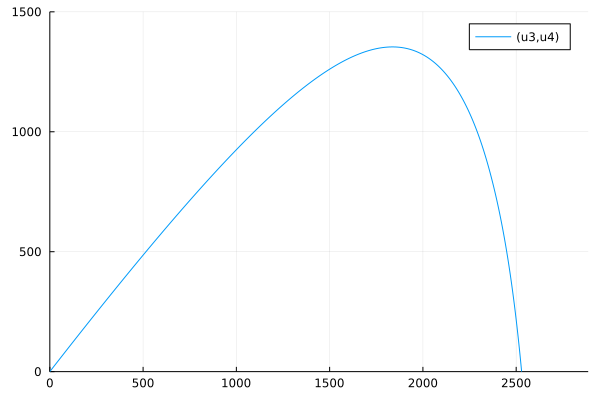

In [31]:
using DifferentialEquations, DataFrames, Plots

# Using meters (m), seconds(s), kilograms (kg), moles (mol), Kelvin (K)
const g₀ = 9.80665      # Earth gravitational acceleration on surface (m/s)
const T₀ = 273.15       # Standard Temperature (K)
const ρ₀ = 1.2250       # Standard density at sea level (kg/m³)
const MM = 0.0289644    # Molar Mass of air (kg/mol)
const R  = 8.3144598    # Universal gas constant (N·m/(mol·K))
const Lᵣ = -0.0065      # Standard temperature lapse rate (K/m)

const m = 17.6
const r = 0.175/2
const v₀ = 450.0
θ = π/4
const Cd = 0.5
const A = π*r^2

g = [0.0, -g₀]

dvdt(v,u,p,t) = g - 0.5*A*ρ₀*v.^2 / m
dudt(v,u,p,t) = v

u0 = [0.0,0.0]
v0 = v₀ * [cos(θ), sin(θ)]

prob = DynamicalODEProblem(dvdt, dudt, v0, u0, (0.0, 30.0))
sol1 = solve(prob, Tsit5(); save_everystep=true)

plot(sol; idxs = (3, 4), ylims = (0, 1500))
# plot(sol)



[-318.19805153394634, 318.1980515339464

]

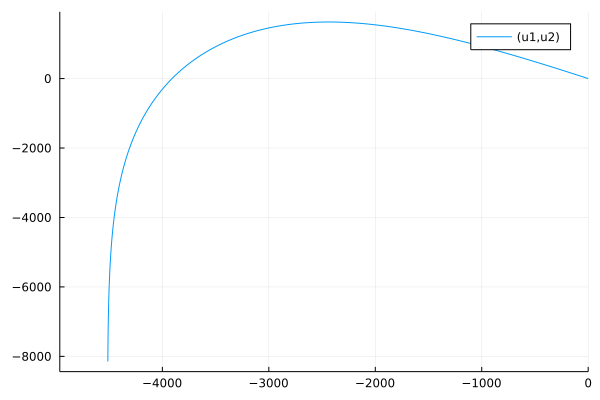

In [49]:
using DifferentialEquations, DataFrames, Plots, LinearAlgebra

# Using meters (m), seconds(s), kilograms (kg), moles (mol), Kelvin (K)
const g₀ = 9.80665      # Earth gravitational acceleration on surface (m/s)
const T₀ = 273.15       # Standard Temperature (K)
const ρ₀ = 1.2250       # Standard density at sea level (kg/m³)
const MM = 0.0289644    # Molar Mass of air (kg/mol)
const R  = 8.3144598    # Universal gas constant (N·m/(mol·K))
const Lᵣ = -0.0065      # Standard temperature lapse rate (K/m)

const m = 17.6
const r = 0.175/2
const v₀ = 450.0
θ = 3π/4
const Cd = 0.5
const A = π*r^2

g = [0.0, -g₀]
ρ(altitude) = ρ₀*(T₀ / (T₀ + altitude*Lᵣ))^(1 + (g₀*MM) / (R*Lᵣ))
thrust(v, t) = t < 10 ? 100*normalize(v) : [0,0]

function drag!(du, u, p, t)
    du[:,1] = u[:,2]
    du[:,2] = g - 0.5*A*Cd*ρ(u[2,1])*u[:,2]*norm(u[:,2]) / m
end

x0 = [0.0,0.0]
v0 = v₀ * [cos(θ), sin(θ)]
print(v0)

u0 = [x0 v0]

prob = ODEProblem(drag!, u0, (0.0, 100))
sol2 = solve(prob; save_everystep=true)

plot(sol2; idxs = (1, 2))#, ylims = (0, 3000))
# plot(sol2; idxs = 3)
# plot(sol)


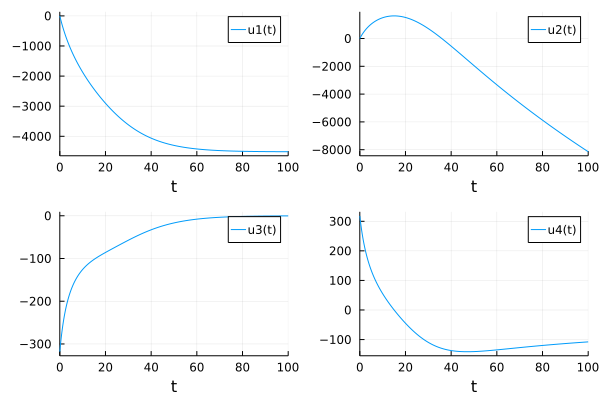

In [47]:
p1 = plot(sol2; idxs = 1)
p2 = plot(sol2; idxs = 2)
p3 = plot(sol2; idxs = 3)
p4 = plot(sol2; idxs = 4)

plot(p1, p2, p3, p4, layout = (2, 2))


In [41]:
tt = [1 2 3 4] * 1.0
normalize(tt)


UndefVarError: UndefVarError: normalize not defined

In [141]:
ttup::Tuple = (1, 2)
ttup = Tuple([3 4])

(3, 4)